# **Sentiment analysis in python**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk #natural language tool kit

In [2]:
# Read in data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(5000)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<AxesSubplot:>

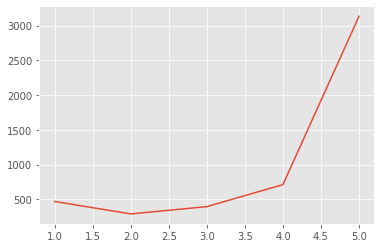

In [3]:
df['Score'].value_counts().sort_index().plot()

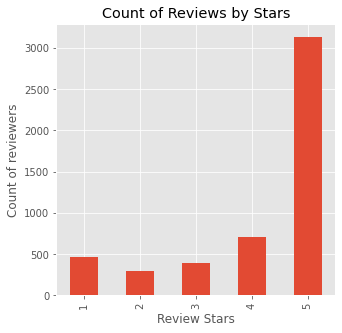

In [4]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',
                    title='Count of Reviews by Stars',
                    figsize=(5,5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count of reviewers')
plt.show()

# **BASIC OF NLTK**

In [5]:
ex = df['Text'][157]
print(ex)

Perfect size sea salt for the table or the picnic basket.  We love it. Shakes well, no clumping and flows freely.


In [6]:
token= nltk.word_tokenize(ex)
token[:10]

['Perfect',
 'size',
 'sea',
 'salt',
 'for',
 'the',
 'table',
 'or',
 'the',
 'picnic']

In [7]:
tagged = nltk.pos_tag(token)
tagged[:10]

[('Perfect', 'NNP'),
 ('size', 'NN'),
 ('sea', 'NN'),
 ('salt', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('table', 'NN'),
 ('or', 'CC'),
 ('the', 'DT'),
 ('picnic', 'NN')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Perfect/NNP)
  size/NN
  sea/NN
  salt/NN
  for/IN
  the/DT
  table/NN
  or/CC
  the/DT
  picnic/NN
  basket/NN
  ./.
  We/PRP
  love/VBP
  it/PRP
  ./.
  (PERSON Shakes/NNP)
  well/RB
  ,/,
  no/DT
  clumping/NN
  and/CC
  flows/VBZ
  freely/RB
  ./.)


# **VADER Seniment Scoring**

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
sia.polarity_scores('I am not at all sad')

{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.3724}

In [12]:
sia.polarity_scores(ex)

{'neg': 0.071, 'neu': 0.514, 'pos': 0.415, 'compound': 0.8934}

In [13]:
# Run the polarity score on the entire dataset
res = {} #made an empty dictionary 
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/5000 [00:00<?, ?it/s]

In [14]:
#print(res)

In [15]:
data_vaders = pd.DataFrame(res).T
data_vaders = data_vaders.reset_index().rename(columns={'index': 'Id'})
data_vaders = data_vaders.merge(df, how='left')

# Now we have sentiment score and metadata
data_vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


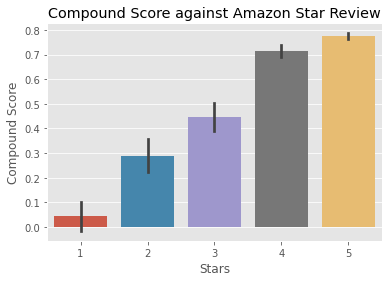

In [16]:
ax = sns.barplot(data=data_vaders, x='Score', y='compound')
ax.set_title('Compound Score against Amazon Star Review')
ax.set_xlabel('Stars')
ax.set_ylabel('Compound Score')
plt.show()

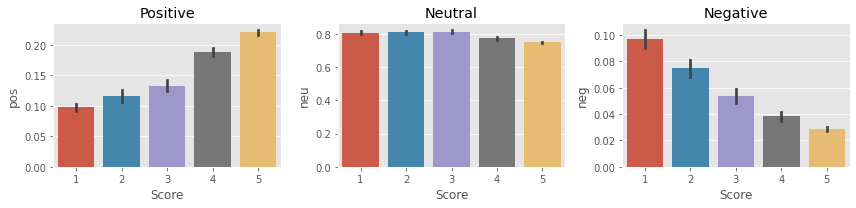

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=data_vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=data_vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=data_vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **Roberta Pretrained Model**

In [18]:
from transformers import AutoTokenizer #huggingface library
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)